In [1]:
import numpy as np
import utils
import time
import matplotlib.pyplot as plt
import pickle
Run_Analysis = False


# Encryption Performance

In [2]:
encrypt_time = None
bits = None

if Run_Analysis:
    bits = np.arange(100, 2048, 1)
    encrypt_time = np.zeros(len(bits))
    message = "Hello World"

    for i in range(len(bits)):
        n, e, d, p, q = utils.generate_keys_bits(bits[i])
        start = time.time_ns()
        encryptedMsg = utils.Encrypt(message, n, e)
        stop = time.time_ns()
        encrypt_time[i] = stop - start
        decryptedMsg = utils.Decrypt(encryptedMsg, n, d)
        if decryptedMsg != message:
            print("Error")
            break

    print("Done")
    
    pickle.dump(encrypt_time, open("./calculated_time/encrypt_time.p", "wb"))
    pickle.dump(bits, open("./calculated_time/bits", "wb"))

else:
    
    encrypt_time = pickle.load(open("./calculated_time/encrypt_time.p", "rb"))
    bits = pickle.load(open("./calculated_time/bits.p", "rb"))


Text(0.5, 1.0, 'Encryption Time')

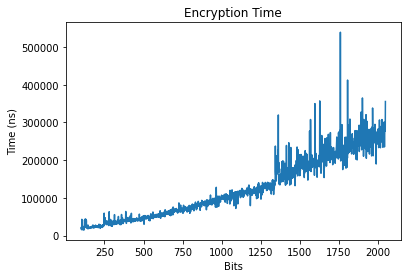

In [3]:
plt.plot(bits, encrypt_time, label="Encrypt")
plt.xlabel("Bits")
plt.ylabel("Time (ns)")
plt.title("Encryption Time")


# Brute Force Attack

In [4]:
bits = None
attack_time = None

if Run_Analysis:
    bits = np.arange(8, 60, 1)
    attack_time = np.zeros(len(bits))

    for i in range(len(bits)):
        n, e, d, p, q = utils.generate_keys_bits(bits[i])
        start = time.time_ns()
        p_n, q_n = utils.Find_p_q(n)
        stop = time.time_ns()
        attack_time[i] = stop - start
        if p_n != p and p_n != q or q_n != q and q_n != p:
            print("Error")
            break

    print("Done")

    pickle.dump(attack_time, open("./calculated_time/attack_time.p", "wb"))
    pickle.dump(bits, open("./calculated_time/bits_attack", "wb"))

else:
    bits_attack = pickle.load(open("./calculated_time/bits_attack.p", "rb"))
    attack_time = pickle.load(open("./calculated_time/attack_time.p", "rb"))


Text(0.5, 1.0, 'Brute Force Attack Time')

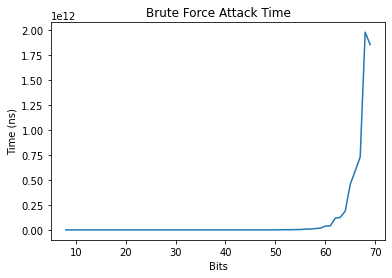

In [5]:
plt.plot(bits_attack, attack_time, label="Brute Force Attack")
plt.xlabel("Bits")
plt.ylabel("Time (ns)")
plt.title("Brute Force Attack Time")


## Chosen Ciphertext Attack

In [6]:
# receiver
n1, e1, d1, p1, q1 = utils.generate_keys()
message = "This message is confidential"

In [7]:
c = utils.Encrypt(message, n1, e1)
hacked_message = utils.Chosen_Ciphertext_Attack(p1, q1, e1, c)
print(hacked_message)


This message is confidential
